# Introduction to Forecasting
* Goals
  * Compare a Holt-Winters forecasted model to known data
  * Understand <em>stationarity</em>, <em>differencing</em> and <em>lagging</em>
  * Introduce ARIMA and describe next steps

### <font color=blue>Simple Exponential Smoothing / Simple Moving Average</font>
This is the simplest to forecast. $\hat{y}$ is equal to the most recent value in the dataset, and the forecast plot is simply a horizontal line extending from the most recent value.
### <font color=blue>Double Exponential Smoothing / Holt's Method</font>
This model takes trend into account. Here the forecast plot is still a straight line extending from the most recent value, but it has slope.
### <font color=blue>Triple Exponential Smoothing / Holt-Winters Method</font>
This model has (so far) the "best" looking forecast plot, as it takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

## Forecasting with the Holt-Winters Method


In [1]:
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
path = 'data_zero.csv'
df=pd.read_csv(path)
columns_names = df.columns
df.index = pd.to_datetime(df[columns_names[0]]/1000, unit='s')
# df.drop(columns[0], axis = 1)
delite_column = columns_names[0]
df = df.drop(delite_column, axis = 1) 
# df.sort_index(inplace= True)
df.sort_index(inplace= True)
df = df.asfreq(freq='1S')
df
# taking_of_nan_values_DF(dfx)

,P20113,P20110,P10216,P10215,P10116,P10115,P10110,P7500
miliseka,,,,,,,,
2013-04-24 07:48:48.569999933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
2013-04-24 07:48:49.569999933,-0.001566,-0.003126,0.013123,0.015001,0.003750,0.000311,-6.250143e-04,0.000625
2013-04-24 07:48:50.569999933,-0.002817,-0.005625,0.007191,0.012501,0.006876,0.000937,-3.437161e-03,-0.000312
2013-04-24 07:48:51.569999933,0.023121,0.018438,0.023754,0.028126,0.013750,0.005621,-3.124952e-03,-0.003750
2013-04-24 07:48:52.569999933,0.024057,0.019997,-0.000937,0.002502,0.013124,0.008121,1.562715e-03,0.001875
...,...,...,...,...,...,...,...,...
2013-04-24 07:57:43.569999933,0.011875,0.017187,-0.000626,0.009377,0.007498,0.001875,-2.499938e-03,0.001562
2013-04-24 07:57:44.569999933,0.000622,-0.002811,0.003752,0.009375,0.009998,0.000311,-1.192093e-07,0.002500
2013-04-24 07:57:45.569999933,0.011246,0.009377,0.003750,0.011250,-0.004063,-0.005939,6.248951e-04,-0.001563


In [2]:
def taking_of_nan_values_DF(dfx):
    # interpolation
    dfx = dfx.interpolate(method='linear', limit_direction='forward', axis=0)
    # taking of nullmi
    dfx = dfx.fillna(method='ffill')
    dfx = dfx.fillna(method='bfill')
    return dfx

In [3]:
df = taking_of_nan_values_DF(df)
df.head()

,P20113,P20110,P10216,P10215,P10116,P10115,P10110,P7500
miliseka,,,,,,,,
2013-04-24 07:48:48.569999933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013-04-24 07:48:49.569999933,-0.001566,-0.003126,0.013123,0.015001,0.003750,0.000311,-0.000625,0.000625
2013-04-24 07:48:50.569999933,-0.002817,-0.005625,0.007191,0.012501,0.006876,0.000937,-0.003437,-0.000312
2013-04-24 07:48:51.569999933,0.023121,0.018438,0.023754,0.028126,0.013750,0.005621,-0.003125,-0.003750
2013-04-24 07:48:52.569999933,0.024057,0.019997,-0.000937,0.002502,0.013124,0.008121,0.001563,0.001875


In [4]:
df.tail()

,P20113,P20110,P10216,P10215,P10116,P10115,P10110,P7500
miliseka,,,,,,,,
2013-04-24 07:57:43.569999933,0.011875,0.017187,-0.000626,0.009377,0.007498,0.001875,-2.499938e-03,0.001562
2013-04-24 07:57:44.569999933,0.000622,-0.002811,0.003752,0.009375,0.009998,0.000311,-1.192093e-07,0.002500
2013-04-24 07:57:45.569999933,0.011246,0.009377,0.003750,0.011250,-0.004063,-0.005939,6.248951e-04,-0.001563
2013-04-24 07:57:46.569999933,0.009998,0.008125,0.018438,0.021252,0.004065,-0.002190,-2.187490e-03,0.002187
2013-04-24 07:57:47.569999933,0.014685,0.019375,0.017185,0.020311,0.005627,0.000937,1.156259e-02,0.013750


In [5]:
df.describe()

,P20113,P20110,P10216,P10215,P10116,P10115,P10110,P7500
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,0.007648,0.005956,0.005645,0.006958,0.000531,-0.004203,0.000710,0.001454
std,0.017505,0.017193,0.028071,0.041276,0.020793,0.020530,0.004224,0.004272
min,-0.075001,-0.070625,-0.125622,-0.180313,-0.101566,-0.101252,-0.022812,-0.027813
25%,-0.002580,-0.004684,0.005001,0.010235,0.000938,-0.004143,-0.001562,-0.000625
50%,0.007809,0.006878,0.012501,0.017502,0.005627,0.000937,0.000625,0.001719
75%,0.019452,0.017187,0.018439,0.023436,0.010311,0.005308,0.003125,0.004062
max,0.064062,0.059374,0.040628,0.046564,0.026249,0.019686,0.020625,0.021250


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 540 entries, 2013-04-24 07:48:48.569999933 to 2013-04-24 07:57:47.569999933
Freq: S
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P20113  540 non-null    float64
 1   P20110  540 non-null    float64
 2   P10216  540 non-null    float64
 3   P10215  540 non-null    float64
 4   P10116  540 non-null    float64
 5   P10115  540 non-null    float64
 6   P10110  540 non-null    float64
 7   P7500   540 non-null    float64
dtypes: float64(8)
memory usage: 38.0 KB


## Train Test Split

In [7]:
train_data = df.iloc[:int(len(df)*0.6)]
test_data = df.iloc[int(len(df)*0.6):]

In [8]:
train_data

,P20113,P20110,P10216,P10215,P10116,P10115,P10110,P7500
miliseka,,,,,,,,
2013-04-24 07:48:48.569999933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013-04-24 07:48:49.569999933,-0.001566,-0.003126,0.013123,0.015001,0.003750,0.000311,-0.000625,0.000625
2013-04-24 07:48:50.569999933,-0.002817,-0.005625,0.007191,0.012501,0.006876,0.000937,-0.003437,-0.000312
2013-04-24 07:48:51.569999933,0.023121,0.018438,0.023754,0.028126,0.013750,0.005621,-0.003125,-0.003750
2013-04-24 07:48:52.569999933,0.024057,0.019997,-0.000937,0.002502,0.013124,0.008121,0.001563,0.001875
...,...,...,...,...,...,...,...,...
2013-04-24 07:54:07.569999933,0.024998,0.025625,0.022503,0.029690,0.010624,0.004995,0.002813,0.005000
2013-04-24 07:54:08.569999933,0.035931,0.036877,0.009064,0.012186,0.018751,0.013124,0.001563,0.005312
2013-04-24 07:54:09.569999933,0.015310,0.017187,0.021566,0.023438,0.009686,-0.000002,-0.000625,0.000312


## Fitting the Model

C:\Users\minda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


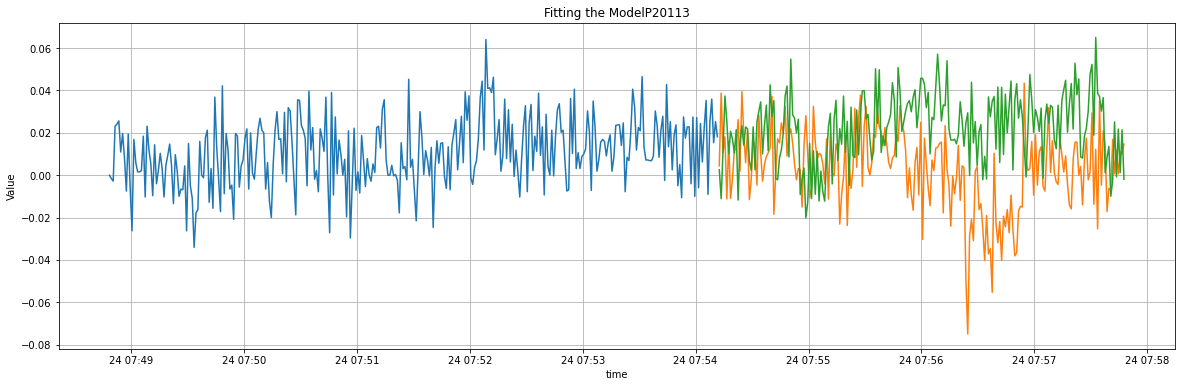

C:\Users\minda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


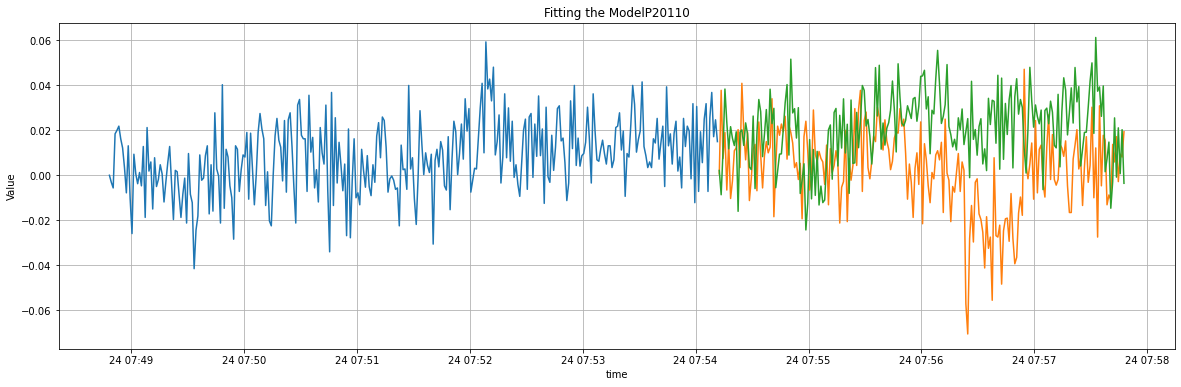

C:\Users\minda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


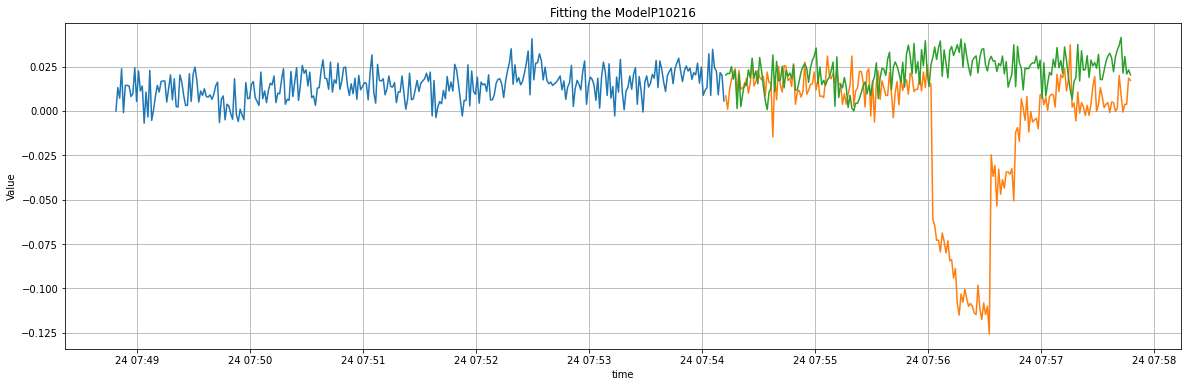

C:\Users\minda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


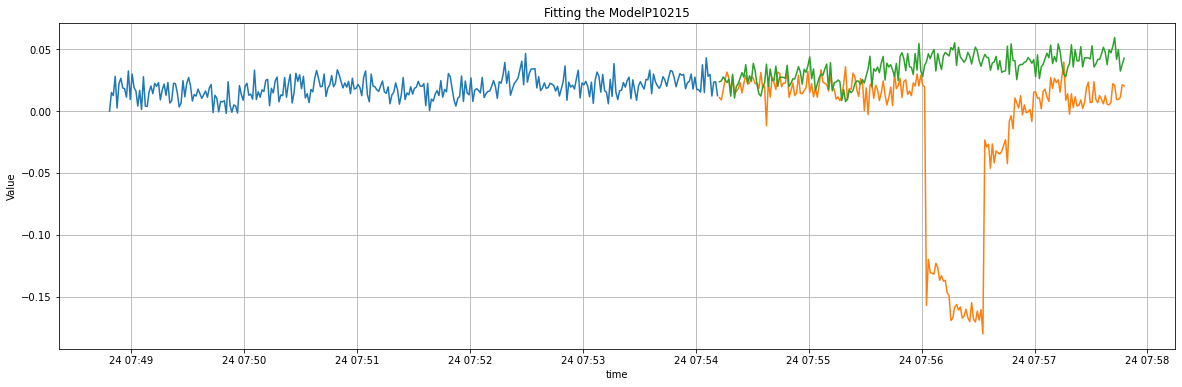

C:\Users\minda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


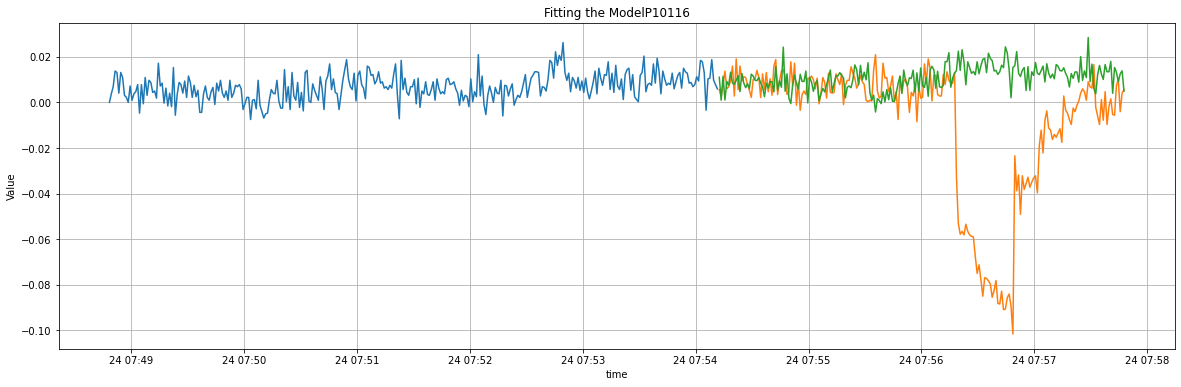

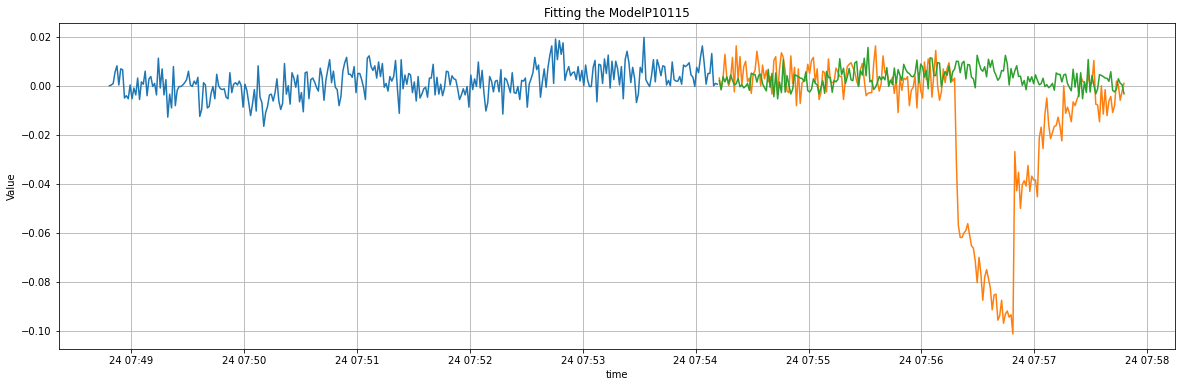

C:\Users\minda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


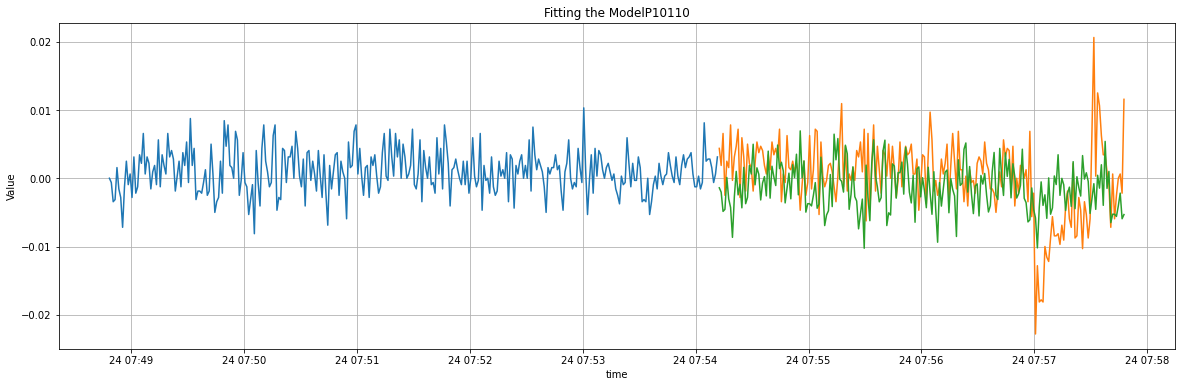

C:\Users\minda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


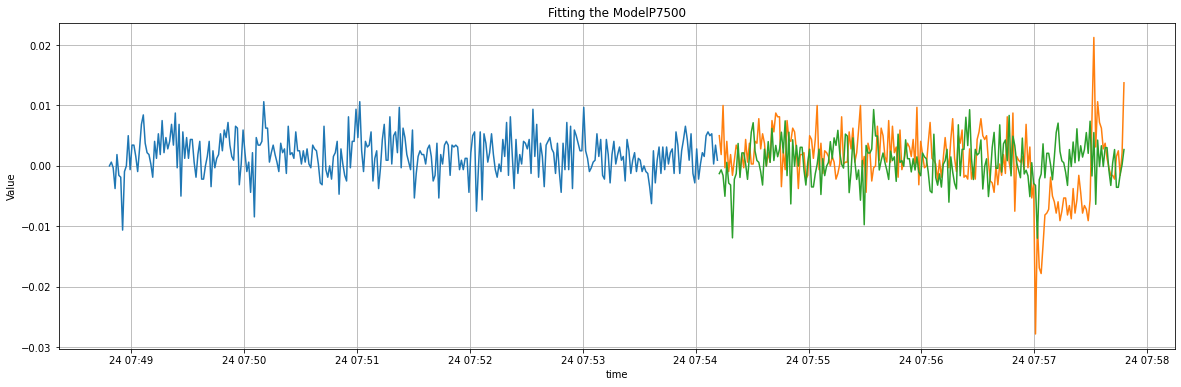

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
length = len(train_data)
length_10_proc = int(length/2)
length_10_proc

columns = df.columns
for column in columns:
    fitted_model = ExponentialSmoothing(train_data[column], trend='add',seasonal='add',seasonal_periods=length_10_proc).fit()
    # Evaluating Model against Test Set
    test_predictions = fitted_model.forecast(len(df)*0.4).rename('HW Forecast')
    
    plt.figure(figsize=(20, 6))
    plt.plot(train_data[column],label='TRAIN'+column)
    plt.plot(test_data[column], label='TEST'+column)
    plt.plot(test_predictions, label='PREDICTION'+ column);
    
    plt.title('Fitting the Model'+ column)
    plt.xlabel('time')
    plt.ylabel('Value')
    plt.grid()
    plt.show()
    

## Evaluation Metrics

In [10]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [11]:
mean_absolute_error_value = mean_absolute_error(train_data[:len(test_data)],test_data[:len(test_data)])
mean_absolute_error_value

0.019199048134463804

In [12]:
mean_squared_error_value = mean_squared_error(train_data[:len(test_data)],test_data[:len(test_data)])
mean_squared_error_value

0.0013198383991724042

In [13]:
np_sqrt_mean_squared_error =np.sqrt(mean_squared_error(train_data[:len(test_data)],test_data[:len(test_data)]))
np_sqrt_mean_squared_error

0.036329580222903814

In [14]:
test_data.describe()

,P20113,P20110,P10216,P10215,P10116,P10115,P10110,P7500
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.002815,0.002642,-0.007182,-0.010979,-0.008850,-0.013072,0.000258,0.000848
std,0.018668,0.018362,0.039897,0.060204,0.029754,0.029493,0.005468,0.005390
min,-0.075001,-0.070625,-0.125622,-0.180313,-0.101566,-0.101252,-0.022812,-0.027813
25%,-0.008833,-0.007187,-0.005075,0.000080,-0.011328,-0.015001,-0.002187,-0.001563
50%,0.004684,0.005469,0.008907,0.012814,0.003439,-0.000469,0.000937,0.001094
75%,0.015620,0.014688,0.016563,0.021642,0.009686,0.004215,0.003438,0.004062
max,0.043436,0.047188,0.037188,0.039688,0.020939,0.016249,0.020625,0.021250


## Forecasting into Future

In [15]:
train_data2 = df[column_run]


NameError: name 'column_run' is not defined

In [ ]:
final_model = ExponentialSmoothing(train_data2,trend='add',seasonal='add', seasonal_periods=length_10_proc).fit()
#  “add”, “mul”, “additive”, “multiplicative”, None

In [ ]:
forecast_predictions = final_model.forecast(len(df)*0.2)

In [ ]:
df[column_run].plot(figsize=(20,8))
forecast_predictions.plot();